## Import Necessary Modules

In [1]:
# Import scraping modules
from urllib.request import urlopen
from bs4 import BeautifulSoup

# Import data manipulation modules
import pandas as pd
import numpy as np

# Import data visualization modules
import matplotlib as mpl
import matplotlib.pyplot as plt

## Scrape Data From Website

In [2]:
# URL of page
url = 'https://www.pro-football-reference.com/years/2020/passing.htm'

# Open URL and pass to BeautifulSoup
html = urlopen(url)
stats_page = BeautifulSoup(html)

In [3]:
# Collect table headers
column_headers = stats_page.findAll('tr')[0]
column_headers = [i.getText() for i in column_headers.findAll('th')]

In [4]:
# Collect table rows
rows = stats_page.findAll('tr')[1:]

# Get stats from each row
qb_stats = []
for i in range(len(rows)):
    qb_stats.append([col.getText() for col in rows[i].findAll('td')])

## Create DataFrame

In [5]:
# Create DataFrame from our scraped data
data = pd.DataFrame(qb_stats, columns=column_headers[1:])

In [6]:
# Examine first five rows of data
data.head()

,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,...,Y/G,Rate,QBR,Sk,Yds,Sk%,NY/A,ANY/A,4QC,GWD
0,Deshaun Watson*,HOU,25,QB,16,16,4-12-0,382,544,70.2,...,301.4,112.4,70.5,49,293,8.3,7.64,8.22,,
1,Patrick Mahomes*,KAN,25,QB,15,15,14-1-0,390,588,66.3,...,316.0,108.2,82.9,22,147,3.6,7.53,8.33,3,3
2,Tom Brady,TAM,43,QB,16,16,11-5-0,401,610,65.7,...,289.6,102.2,72.5,21,143,3.3,7.12,7.53,3,3
3,Matt Ryan,ATL,35,QB,16,16,4-12-0,407,626,65.0,...,286.3,93.3,67.0,41,257,6.1,6.48,6.52,,
4,Josh Allen*,BUF,24,QB,16,16,13-3-0,396,572,69.2,...,284.0,107.2,81.7,26,159,4.3,7.33,7.82,2,3


In [7]:
# View columns in data
data.columns

Index(['Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C',
       'Y/G', 'Rate', 'QBR', 'Sk', 'Yds', 'Sk%', 'NY/A', 'ANY/A', '4QC',
       'GWD'],
      dtype='object')

Need to rename the sack yards column to differentiate from passing yards

In [8]:
# Rename sack yards column to `Yds_Sack`
new_columns = data.columns.values
new_columns[-6] = 'Yds_Sack'
data.columns = new_columns

In [9]:
# View columns in data
data.columns

Index(['Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C',
       'Y/G', 'Rate', 'QBR', 'Sk', 'Yds_Sack', 'Sk%', 'NY/A', 'ANY/A', '4QC',
       'GWD'],
      dtype='object')

## Select Certain Columns for Data Visualization

In [10]:
# Select stat categories
categories = ['Cmp%', 'Yds', 'TD', 'Int', 'Y/A', 'Rate']

In [11]:
# Create data subset for radar chart
data_radar = data[['Player', 'Tm'] + categories]
data_radar.head()

,Player,Tm,Cmp%,Yds,TD,Int,Y/A,Rate
0,Deshaun Watson*,HOU,70.2,4823,33,7,8.9,112.4
1,Patrick Mahomes*,KAN,66.3,4740,38,6,8.1,108.2
2,Tom Brady,TAM,65.7,4633,40,12,7.6,102.2
3,Matt Ryan,ATL,65.0,4581,26,11,7.3,93.3
4,Josh Allen*,BUF,69.2,4544,37,10,7.9,107.2


# Make Sure Data is Usable

In [12]:
# Check data types
data_radar.dtypes

Player    object
Tm        object
Cmp%      object
Yds       object
TD        object
Int       object
Y/A       object
Rate      object
dtype: object

In [13]:
# Convert data to numerical values

data[categories] = data[categories].apply(pd.to_numeric, errors='coerce', axis=1)

In [14]:
data_radar.dtypes

Player    object
Tm        object
Cmp%      object
Yds       object
TD        object
Int       object
Y/A       object
Rate      object
dtype: object

In [15]:
# Remove ornamental characters for achievements
data['Player'] = data['Player'].str.replace('*', '')
data['Player'] = data['Player'].str.replace('+', '')

In [16]:
data_radar = data[['Player', 'Tm'] + categories]
data_radar.head(32)

,Player,Tm,Cmp%,Yds,TD,Int,Y/A,Rate
0,Deshaun Watson,HOU,70.2,4823.0,33.0,7.0,8.9,112.4
1,Patrick Mahomes,KAN,66.3,4740.0,38.0,6.0,8.1,108.2
2,Tom Brady,TAM,65.7,4633.0,40.0,12.0,7.6,102.2
3,Matt Ryan,ATL,65.0,4581.0,26.0,11.0,7.3,93.3
4,Josh Allen,BUF,69.2,4544.0,37.0,10.0,7.9,107.2
5,Justin Herbert,LAC,66.6,4336.0,31.0,10.0,7.3,98.3
6,Aaron Rodgers,GNB,70.7,4299.0,48.0,5.0,8.2,121.5
7,Kirk Cousins,MIN,67.6,4265.0,35.0,13.0,8.3,105.0
8,Russell Wilson,SEA,68.8,4212.0,40.0,13.0,7.5,105.1
9,Philip Rivers,IND,68.0,4169.0,24.0,11.0,7.7,97.0


## Filter Data and Create Metric for Visualization

In [17]:
# Filter by passing yards
data_radar_filtered = data_radar[data_radar['Yds'] > 1500]

In [18]:
# Create columns with percentile rank
for i in categories:
    data_radar_filtered[i + '_Rank'] = data_radar_filtered[i].rank(pct=True)

# We need to flip the rank for interceptions
data_radar_filtered['Int_Rank'] = 1 - data_radar_filtered['Int_Rank']

C:\Users\ndren\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ndren\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
data_radar_filtered.head(25)

,Player,Tm,Cmp%,Yds,TD,Int,Y/A,Rate,Cmp%_Rank,Yds_Rank,TD_Rank,Int_Rank,Y/A_Rank,Rate_Rank
0,Deshaun Watson,HOU,70.2,4823.0,33.0,7.0,8.9,112.4,0.942857,1.000000,0.800000,0.757143,1.000000,0.971429
1,Patrick Mahomes,KAN,66.3,4740.0,38.0,6.0,8.1,108.2,0.542857,0.971429,0.914286,0.814286,0.885714,0.942857
2,Tom Brady,TAM,65.7,4633.0,40.0,12.0,7.6,102.2,0.457143,0.942857,0.957143,0.171429,0.671429,0.771429
3,Matt Ryan,ATL,65.0,4581.0,26.0,11.0,7.3,93.3,0.342857,0.914286,0.628571,0.271429,0.500000,0.400000
4,Josh Allen,BUF,69.2,4544.0,37.0,10.0,7.9,107.2,0.914286,0.885714,0.885714,0.414286,0.828571,0.914286
5,Justin Herbert,LAC,66.6,4336.0,31.0,10.0,7.3,98.3,0.571429,0.857143,0.742857,0.414286,0.500000,0.657143
6,Aaron Rodgers,GNB,70.7,4299.0,48.0,5.0,8.2,121.5,1.000000,0.828571,1.000000,0.900000,0.914286,1.000000
7,Kirk Cousins,MIN,67.6,4265.0,35.0,13.0,8.3,105.0,0.742857,0.800000,0.857143,0.085714,0.942857,0.800000
8,Russell Wilson,SEA,68.8,4212.0,40.0,13.0,7.5,105.1,0.857143,0.771429,0.957143,0.085714,0.600000,0.828571
9,Philip Rivers,IND,68.0,4169.0,24.0,11.0,7.7,97.0,0.785714,0.742857,0.528571,0.271429,0.728571,0.628571


## Create Parameters for Radar Charts

In [20]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['xtick.major.pad'] = 15

In [21]:
team_colors = {'ARI':'#97233f', 'ATL':'#a71930', 'BAL':'#241773', 'BUF':'#00338d',
               'CAR':'#0085ca', 'CHI':'#0b162a', 'CIN':'#fb4f14', 'CLE':'#311d00',
               'DAL':'#041e42', 'DEN':'#002244', 'DET':'#0076b6', 'GNB':'#203731',
               'HOU':'#03202f', 'IND':'#002c5f', 'JAX':'#006778', 'KAN':'#e31837',
               'LAC':'#002a5e', 'LAR':'#003594', 'MIA':'#008e97', 'MIN':'#4f2683',
               'NWE':'#002244', 'NOR':'#d3bc8d', 'NYG':'#0b2265', 'NYJ':'#125740',
               'LVR':'#000000', 'PHI':'#004c54', 'PIT':'#ffb612', 'SFO':'#aa0000',
               'SEA':'#002244', 'TAM':'#d50a0a', 'TEN':'#0c2340', 'WAS':'#773141'}

In [22]:
# Calculate angles for radar chart
offset = np.pi/6
angles = np.linspace(0, 2*np.pi, len(categories) + 1) + offset

In [23]:
# Function to create radar chart
def create_radar_chart(ax, angles, player_data, color='blue'):
    
    # Plot data and fill with team color
    ax.plot(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, linewidth=2)
    ax.fill(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, alpha=0.2)
    
    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    # Remove radial labels
    ax.set_yticklabels([])

    # Add player name
    ax.text(np.pi/2, 1.7, player_data[0], ha='center', va='center', size=18, color=color)
    
    # Use white grid
    ax.grid(color='white', linewidth=1.5)

    # Set axis limits
    ax.set(xlim=(0, 2*np.pi), ylim=(0, 1))

    return ax

## Function to Pull Data for Each QB

In [24]:
# Function to get QB data
def get_qb_data(data, team):
    return np.asarray(data[data['Tm'] == team])[0]

## Create Radar Charts for QB's by Division

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


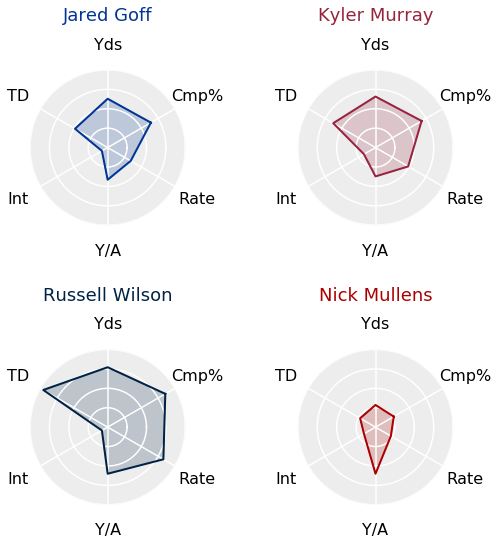

In [25]:
# NFC West
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
sf_data = get_qb_data(data_radar_filtered, 'SFO')
sea_data = get_qb_data(data_radar_filtered, 'SEA')
ari_data = get_qb_data(data_radar_filtered, 'ARI')
lar_data = get_qb_data(data_radar_filtered, 'LAR')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, lar_data, team_colors['LAR'])
ax2 = create_radar_chart(ax2, angles, ari_data, team_colors['ARI'])
ax3 = create_radar_chart(ax3, angles, sea_data, team_colors['SEA'])
ax4 = create_radar_chart(ax4, angles, sf_data, team_colors['SFO'])

plt.show()

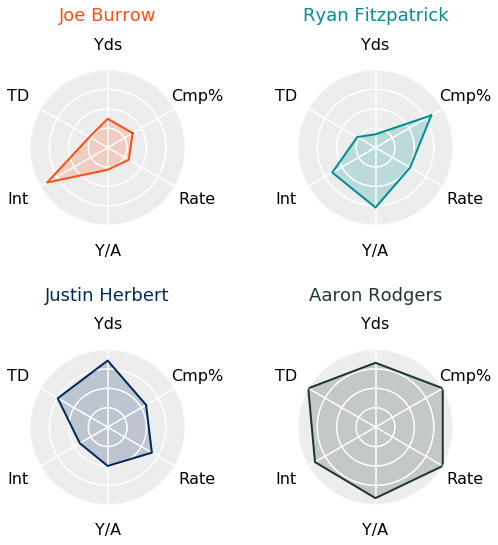

In [26]:
# 1st Round Draft Picks
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
cin_data = get_qb_data(data_radar_filtered, 'CIN')
mia_data = get_qb_data(data_radar_filtered, 'MIA')
lac_data = get_qb_data(data_radar_filtered, 'LAC')
gnb_data = get_qb_data(data_radar_filtered, 'GNB')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, cin_data, team_colors['CIN'])
ax2 = create_radar_chart(ax2, angles, mia_data, team_colors['MIA'])
ax3 = create_radar_chart(ax3, angles, lac_data, team_colors['LAC'])
ax4 = create_radar_chart(ax4, angles, gnb_data, team_colors['GNB'])

plt.show()

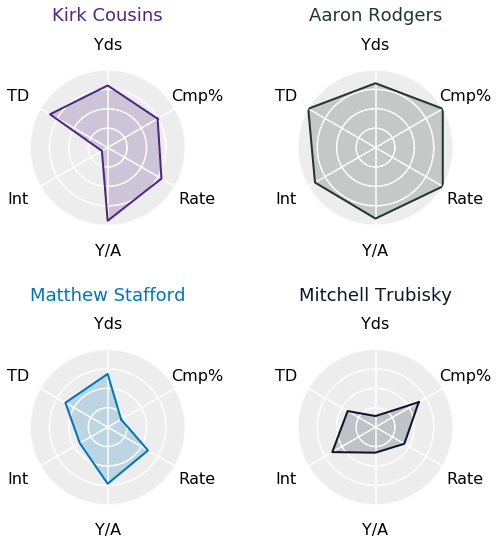

In [27]:
# NFC North
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
min_data = get_qb_data(data_radar_filtered, 'MIN')
gnb_data = get_qb_data(data_radar_filtered, 'GNB')
det_data = get_qb_data(data_radar_filtered, 'DET')
chi_data = get_qb_data(data_radar_filtered, 'CHI')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, min_data, team_colors['MIN'])
ax2 = create_radar_chart(ax2, angles, gnb_data, team_colors['GNB'])
ax3 = create_radar_chart(ax3, angles, det_data, team_colors['DET'])
ax4 = create_radar_chart(ax4, angles, chi_data, team_colors['CHI'])

plt.show()

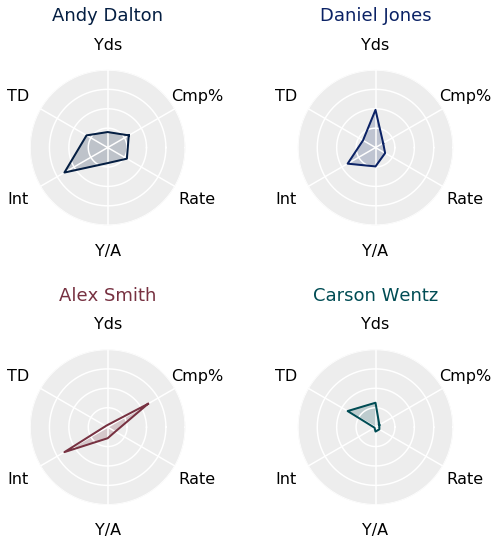

In [28]:
# NFC East
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
dal_data = get_qb_data(data_radar_filtered, 'DAL')
nyg_data = get_qb_data(data_radar_filtered, 'NYG')
was_data = get_qb_data(data_radar_filtered, 'WAS')
phi_data = get_qb_data(data_radar_filtered, 'PHI')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, dal_data, team_colors['DAL'])
ax2 = create_radar_chart(ax2, angles, nyg_data, team_colors['NYG'])
ax3 = create_radar_chart(ax3, angles, was_data, team_colors['WAS'])
ax4 = create_radar_chart(ax4, angles, phi_data, team_colors['PHI'])

plt.show()

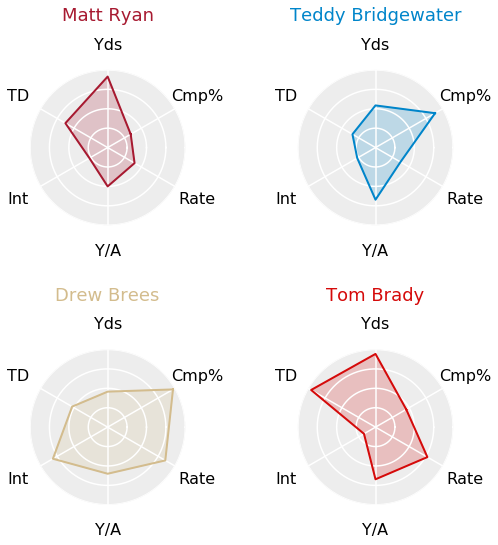

In [29]:
# NFC South
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
atl_data = get_qb_data(data_radar_filtered, 'ATL')
car_data = get_qb_data(data_radar_filtered, 'CAR')
nor_data = get_qb_data(data_radar_filtered, 'NOR')
tam_data = get_qb_data(data_radar_filtered, 'TAM')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, atl_data, team_colors['ATL'])
ax2 = create_radar_chart(ax2, angles, car_data, team_colors['CAR'])
ax3 = create_radar_chart(ax3, angles, nor_data, team_colors['NOR'])
ax4 = create_radar_chart(ax4, angles, tam_data, team_colors['TAM'])

plt.show()

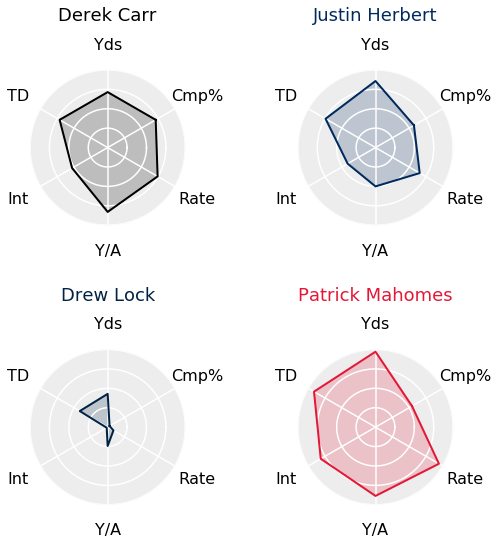

In [30]:
# AFC West
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
lvr_data = get_qb_data(data_radar_filtered, 'LVR')
lac_data = get_qb_data(data_radar_filtered, 'LAC')
den_data = get_qb_data(data_radar_filtered, 'DEN')
kan_data = get_qb_data(data_radar_filtered, 'KAN')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, lvr_data, team_colors['LVR'])
ax2 = create_radar_chart(ax2, angles, lac_data, team_colors['LAC'])
ax3 = create_radar_chart(ax3, angles, den_data, team_colors['DEN'])
ax4 = create_radar_chart(ax4, angles, kan_data, team_colors['KAN'])

plt.show()

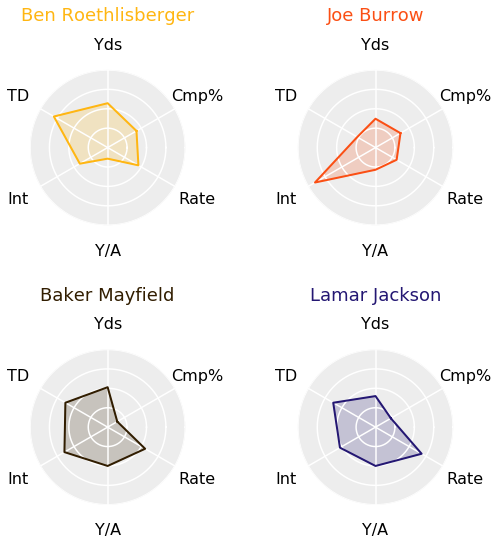

In [31]:
# AFC North
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
pit_data = get_qb_data(data_radar_filtered, 'PIT')
cin_data = get_qb_data(data_radar_filtered, 'CIN')
cle_data = get_qb_data(data_radar_filtered, 'CLE')
bal_data = get_qb_data(data_radar_filtered, 'BAL')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, pit_data, team_colors['PIT'])
ax2 = create_radar_chart(ax2, angles, cin_data, team_colors['CIN'])
ax3 = create_radar_chart(ax3, angles, cle_data, team_colors['CLE'])
ax4 = create_radar_chart(ax4, angles, bal_data, team_colors['BAL'])

plt.show()

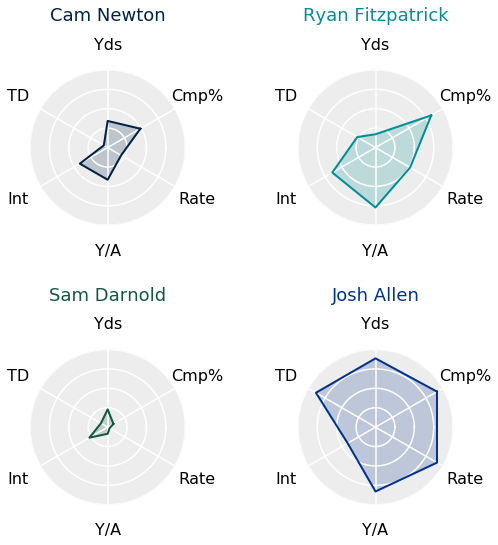

In [32]:
# AFC East
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
nwe_data = get_qb_data(data_radar_filtered, 'NWE')
mia_data = get_qb_data(data_radar_filtered, 'MIA')
nyj_data = get_qb_data(data_radar_filtered, 'NYJ')
buf_data = get_qb_data(data_radar_filtered, 'BUF')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, nwe_data, team_colors['NWE'])
ax2 = create_radar_chart(ax2, angles, mia_data, team_colors['MIA'])
ax3 = create_radar_chart(ax3, angles, nyj_data, team_colors['NYJ'])
ax4 = create_radar_chart(ax4, angles, buf_data, team_colors['BUF'])

plt.show()

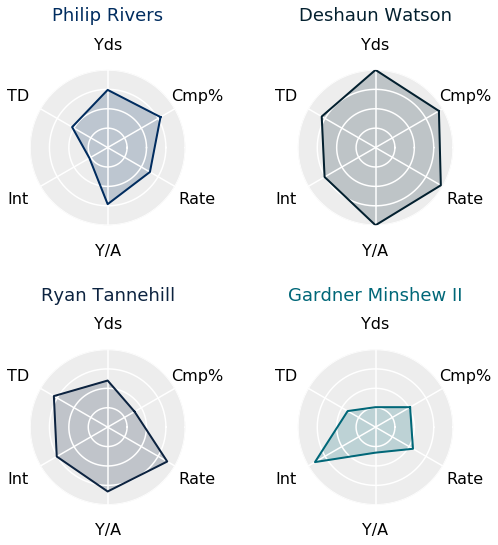

In [33]:
# AFC South
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
ind_data = get_qb_data(data_radar_filtered, 'IND')
hou_data = get_qb_data(data_radar_filtered, 'HOU')
ten_data = get_qb_data(data_radar_filtered, 'TEN')
jax_data = get_qb_data(data_radar_filtered, 'JAX')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, ind_data, team_colors['IND'])
ax2 = create_radar_chart(ax2, angles, hou_data, team_colors['HOU'])
ax3 = create_radar_chart(ax3, angles, ten_data, team_colors['TEN'])
ax4 = create_radar_chart(ax4, angles, jax_data, team_colors['JAX'])

plt.show()

## Create Radar Chart for MVP Candidates

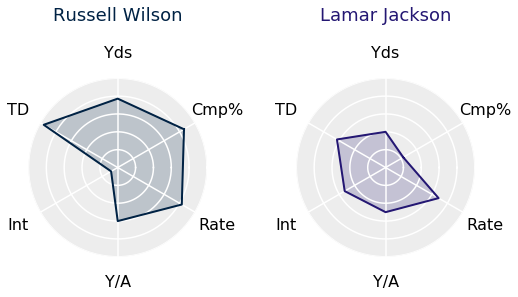

In [34]:
# MVP Race
# Create figure
fig = plt.figure(figsize=(8, 4), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(121, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(122, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
bal_data = get_qb_data(data_radar_filtered, 'BAL')
sea_data = get_qb_data(data_radar_filtered, 'SEA')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, sea_data, team_colors['SEA'])
ax2 = create_radar_chart(ax2, angles, bal_data, team_colors['BAL'])

plt.show()